<a href="https://colab.research.google.com/github/inefable12/CQCPE_2023_jesus/blob/main/Python_para_quimica_Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Antes de iniciar...

¿Donde me encuentro, qué archivos hay, cuanto pesa la carpeta?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/2023_2/UNMSM/Cl1y2_repaso

In [ ]:
!du -hs

In [ ]:
!ls

Operaciones

In [ ]:
5*7 #multiplicación

In [ ]:
5**7 #exponenciación

In [ ]:
20/3 #división

In [ ]:
20%3 #resto

In [ ]:
20//3 #cociente

# Nivel 1: Visualización 2D de moléculas | SMILES

RDKit es una colección de programas de quimioinformática y aprendizaje automático escrito en C++ y Python, disponible en https://github.com/rdkit/rdkit

Fue desarrollado y usado en descubrimiento racional de fármacos desde el año 2000 para construir modelos predictivos para ADME, Tox, actividad biológica, etc. En el 2006 se disponibilizo mediante código abierto y su desarrollo continúa con la contribución de Novartis.

La documentación se encuentra disponible en https://www.rdkit.org/docs/index.html

RDKit provee varias funciones para representar las moléculas en código SMILES

Instalamos RDKit para visualizar las moléculas representadas en SMILES

In [ ]:
!pip install rdkit

In [ ]:
from rdkit.Chem import MolFromSmiles

mi_molecula = 'O=C(Oc1ccccc1C(=O)O)C'
MolFromSmiles(mi_molecula)

In [ ]:
# Dibujar la molécula de pirazinamida

MolFromSmiles('c1nccnc1C(=O)N')

Visualización de un grupo de moléculas

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

antiTBC = ['c1nccnc1','c1(C(=O)N)nccnc1','C1=CN=CC=C1C(=O)NN','C1=CN=CC=C1C(=O)NNC', 'C1=CN=CC=C1C(=O)NNCC','CCC(CO)NCCNC(CC)CO']
mol_lista = []

for i in antiTBC:
  mol = Chem.MolFromSmiles(i)
  mol_lista.append(mol)
Draw.MolsToGridImage(mol_lista)

In [ ]:
smiles_list = ['CCCCC', 'CCOCC','CCNCC',
               'CCSCC','CCCCF','CCCCCl',
               'CCSCBr','CCCC(=C)','CCCCI']

#Ahora usando "list comprehension"
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

imagen = Draw.MolsToGridImage(mol_list)
imagen

Nociones de isomería

In [ ]:
# SMILES de alpha-D-glucose
from rdkit.Chem import MolFromSmiles

alpha_d_glucose = 'O[C@@H]1[C@H](O)[C@@H](O)[C@H](O)[C@@H](CO)O1'
MolFromSmiles(alpha_d_glucose)

# Nivel 2: Masa molecular

In [ ]:
from rdkit.Chem import Descriptors

glucosa = Chem.MolFromSmiles(alpha_d_glucose)
mw_glucosa= Descriptors.MolWt(glucosa)
mw_glucosa

In [ ]:
mw_glucosa_smiles = Descriptors.MolWt(Chem.MolFromSmiles('O[C@@H]1[C@H](O)[C@@H](O)[C@H](O)[C@@H](CO)O1'))
mw_glucosa_smiles

¿Cuál es la masa molecular del etanol?

In [ ]:
mw_etanol_smiles = Descriptors.MolWt(Chem.MolFromSmiles('CCO'))
mw_etanol_smiles

# Nivel 3: Mi tabla periódica

RDKit posee también información por elementos, veamos como gestionar estos datos para construir un DataFrame

In [ ]:
from rdkit import Chem

PeriodicTable = Chem.GetPeriodicTable()

In [ ]:
# ¿Qué es PeriodicTable?
help(PeriodicTable)

In [ ]:
# Podemos generar una lista de elementos

element_symbols = []

for i in range(1,11):
  element_symbols.append(PeriodicTable.GetElementSymbol(i))

In [ ]:
#Imprimimos la lista generada
element_symbols

In [ ]:
# ¿Qué información tenemos? Probemos
# PeriodicTable.

In [ ]:
PeriodicTable.GetAtomicNumber('C')

In [ ]:
PeriodicTable.GetAtomicWeight('He')

In [ ]:
PeriodicTable.GetValenceList(31)[0]

In [ ]:
PeriodicTable.GetMostCommonIsotope('C')

In [ ]:
PeriodicTable.GetMassForIsotope('C',14)

In [ ]:
masa_atomica = [PeriodicTable.GetAtomicWeight(x) for x in element_symbols]
masa_atomica

In [ ]:
# Guardemos estas informaciones en listas
numero_atomico = [PeriodicTable.GetAtomicNumber(x) for x in element_symbols]
masa_atomica = [PeriodicTable.GetAtomicWeight(x) for x in element_symbols]
nombre_del_elemento = [PeriodicTable.GetElementName(x) for x in range(1,11)]
valencias = [PeriodicTable.GetValenceList(x) for x in range(1,11)]

In [ ]:
import pandas as pd

data = {'nombre': nombre_del_elemento, 'simbolo': element_symbols,
        'masa_atomica': masa_atomica, 'numero_atomico': numero_atomico,
        'valencias': valencias}
df = pd.DataFrame(data)
df

Hagamos unas consultas

In [ ]:
df.index

In [ ]:
df["masa_atomica"][3]

In [ ]:
# ¿Cuál es el elemento con mayor masa atómica  en el DataFrame?
df["masa_atomica"].max()

In [ ]:
len(df)

In [ ]:
# ¿cual es el valor promedio del número atómico?
df["masa_atomica"].sum() / len(df)

In [ ]:
# Elemento con Z=6
Z = int(input("ingresa el número de protones: "))
elemento=Z-1
df["nombre"][Z-1]

In [ ]:
# Crear una nueva columna a partir de la masa_atomica y numero_atomico
df["extra"] = df["masa_atomica"] + df["numero_atomico"]
df

In [ ]:
# También podemos agregar operaciones con numpy
import numpy as np
np.sqrt(df[["extra"]])

In [ ]:
df.loc[2]

In [ ]:
df.loc[[3,7,9]]

In [ ]:
# Seleccionar una columna como índice
dfi = df.set_index('simbolo')
dfi

In [ ]:
# Hacer el llamado por simbolo del elemento
dfi.loc[["Be","O","Ne"]]

In [ ]:
# Hacer el llamado por una condición
dfi.loc[(dfi.numero_atomico > 5) & (dfi.numero_atomico < 9)]

El operador *iloc*

La indexación orientada a los enteros puede implementarse para los
mismos casos que la indexación orientada a las etiquetas (loc): etiquetas individuales, una lista de etiquetas, corte de rangos y matrices
booleanas

In [ ]:
df.iloc[3,2], df.iloc[9,2]

In [ ]:
# Con lista de índices: df.iloc[[enumerar filas],[enumerar columnas]]
df.iloc[[2,5,9],[2,5,0]]

In [ ]:
# Indexación con corte de rango: df.iloc[rango_de_filas,rango_de_columnas]
df.iloc[4:8,3:]

In [ ]:
# Indexación con matriz booleana
df.iloc[(df["masa_atomica"] > 11).values, :]

RDKit + Pandas

In [ ]:
from rdkit.Chem import PandasTools
import pandas as pd
import os
from rdkit import RDConfig
antibiotics = pd.DataFrame(columns=['Name','Smiles'])
antibiotics = pd.concat([antibiotics, pd.DataFrame.from_records([{'Smiles':'CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C',
  'Name':'Penicilline G'}])], ignore_index=True) #Penicilline G
antibiotics = pd.concat([antibiotics,pd.DataFrame.from_records([{
  'Smiles':'CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4O)O)O)O)C(=O)N)N(C)C)O',
  'Name':'Tetracycline'}])], ignore_index=True) #Tetracycline
antibiotics = pd.concat([antibiotics,pd.DataFrame.from_records([{
  'Smiles':'CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O)O)C',
  'Name':'Ampicilline'}])], ignore_index=True) #Ampicilline
#print([str(x) for x in  antibiotics.columns])
#['Name', 'Smiles']
antibiotics

# Nivel 4: Ejercicios

## Ejercicio 1: Cálculo de masas

**A**. Se muestra una reacción de acoplamiento cruzado de Suzuki para sintetizar *(E)*-2-metil-2,4-nonadieno [1]. Calcule la masa de cada reactivo/catalizador que se debe agregar para llevar a cabo la reacción para $1.0 mmol$.

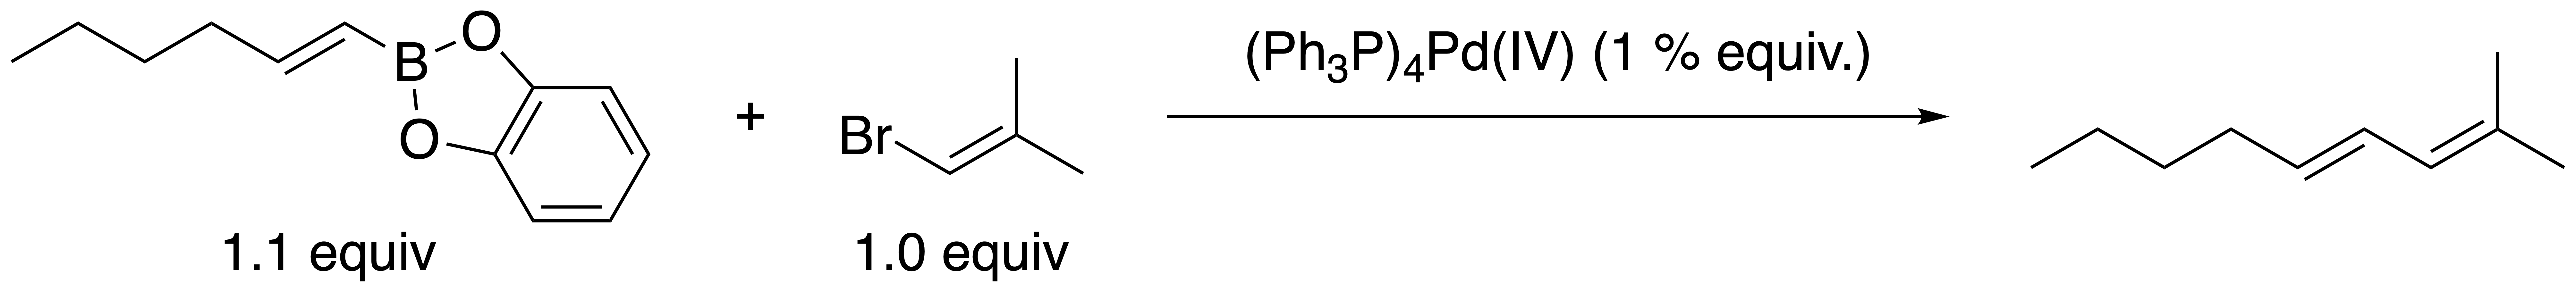

### Solución



In [ ]:
# Dato: masas moleculares
benzodioxaborole_mw = 202.06 # g/mol
bromopropene_mw = 135.00 # g/mol
pd_catalyst_mw = 1155.59 # g/mol

milimoles = 1.0 # mmol

# equivalencia:

benzodioxaborole_equiv = 1.1
bromopropene_equiv = 1.0
pd_catalyst_equiv = 0.01

In [ ]:
# Empleamos: masa=moles*equivalentes*masa_molecular
# para calcular la masa para cada uno:

benzodioxaborole_mass = milimoles * benzodioxaborole_equiv * benzodioxaborole_mw
bromopropene_mass = milimoles * bromopropene_equiv * bromopropene_mw
pd_catalyst_mass = milimoles * pd_catalyst_equiv * pd_catalyst_mw

In [ ]:
print('benzodioxaborole: %.2f mg' %benzodioxaborole_mass)
print('bromopropene: %.2f mg' %bromopropene_mass)
print('pd_catalyst: %.2f mg' %pd_catalyst_mass)

## Ejercicio 2: Velocidad de reacción

<img src='https://microbenotes.com/wp-content/uploads/2018/10/The-Michaelis%E2%80%93Menten-model.jpg'>

**B**. La enzima L-arabinosa reductasa LarA de *Aspergillus niger* cataliza la reducción de L-arabinosa a L-arabitol. El ensayo de actividad de LarA con L-arabinosa como sustrato sigue la cinética de Michaelis-Menten con un $K_m$ de $54 mM$. [2] Un ensayo con $0.72 mg$ de enzima y $10 mM$ de L-arabinosa mostró una velocidad de $3.4 unidades$. Calcula $V_{max}$ y $k_{cat}$. Algunas ecuaciones se enumeran a continuación."


Ecuación de Michaelis-Menten

$$
    v = \frac{V_{max}[S]}{K_m + [S]}
$$

for which:
- $v$: velocidad de reacción
- $V_{max}$: velocidad en exceso del substrato
- $K_m$: Constante de Michaelis-Menton
- $[S]$: Concentración de substrato

turnover number (número de recambio)

$$
    V_{max} = k_{cat}[E]
$$

for which:
- $k_{cat}$: turnover number (número de recambio)
- $[E]$: concentración de la enzima


In [ ]:
# Asignar valores conocidos a las variables

# Resolver para obtener Vmax

# Resolver para obtener kcat


## Ejercicio 3: Detección de clorofila con la Ley de Beer-Lambert

**C**. Supongamos que estamos cuantificando la concentración de clorofila "a" en muestras ambientales. El coeficiente de absorción específico $\epsilon$ fue previamente determinado como $84.3 \frac{L}{g \cdot cm}$ a $664 nm$ para el extracto orgánico de clorofila "a". [3\] Una muestra de agua de $5 mL$ fue extraída en éter hasta un volumen final de $13 mL$ y produjo una absorbancia de $0.31$ unidades a $664 nm$ con una longitud de trayectoria de $1 cm$. Utilice la ley de Beer-Lambert para estimar la concentración de clorofila "a".

In [ ]:
# asignar valores conocidos a las variables

# después de escribir cómo resolver el problema, agregar comentarios
# para describir los pasos para llegar a la concentración original de clorofila a
# luego escribir código debajo de los comentarios.

## Ejercicio 4: Influencia de CO2 en la acidez del agua

**D**. El nivel de dióxido de carbono atmosférico se estima que ha aumentado en más de $100 ppm$ desde la Revolución Industrial. El dióxido de carbono acuoso está en equilibrio con el ácido carbónico acuoso, por lo tanto, un aumento en el dióxido de carbono atmosférico puede reducir el pH del agua. La acidificación del océano es una preocupación para los ecosistemas marinos porque las conchas y esqueletos de los organismos marinos en los arrecifes de coral, que están hechos de carbonato de calcio, pueden disolverse a niveles de pH más bajos. \[4\]  Calcula el cambio en el pH en agua pura expuesta a la atmósfera debido al aumento del nivel de $CO_2$ de $280 ppm$ a $380 ppm$. Supón que la disociación del bicarbonato al carbonato es despreciable. Se proporcionan las constantes de equilibrio relevantes.

Ley de Henry

$$
    [gas] = \frac{P}{K_H}
$$

- $P$: Presión
- $K_H$: La constante de Henry para el dióxido de carbono ($29.41\frac{atm}{M}$)


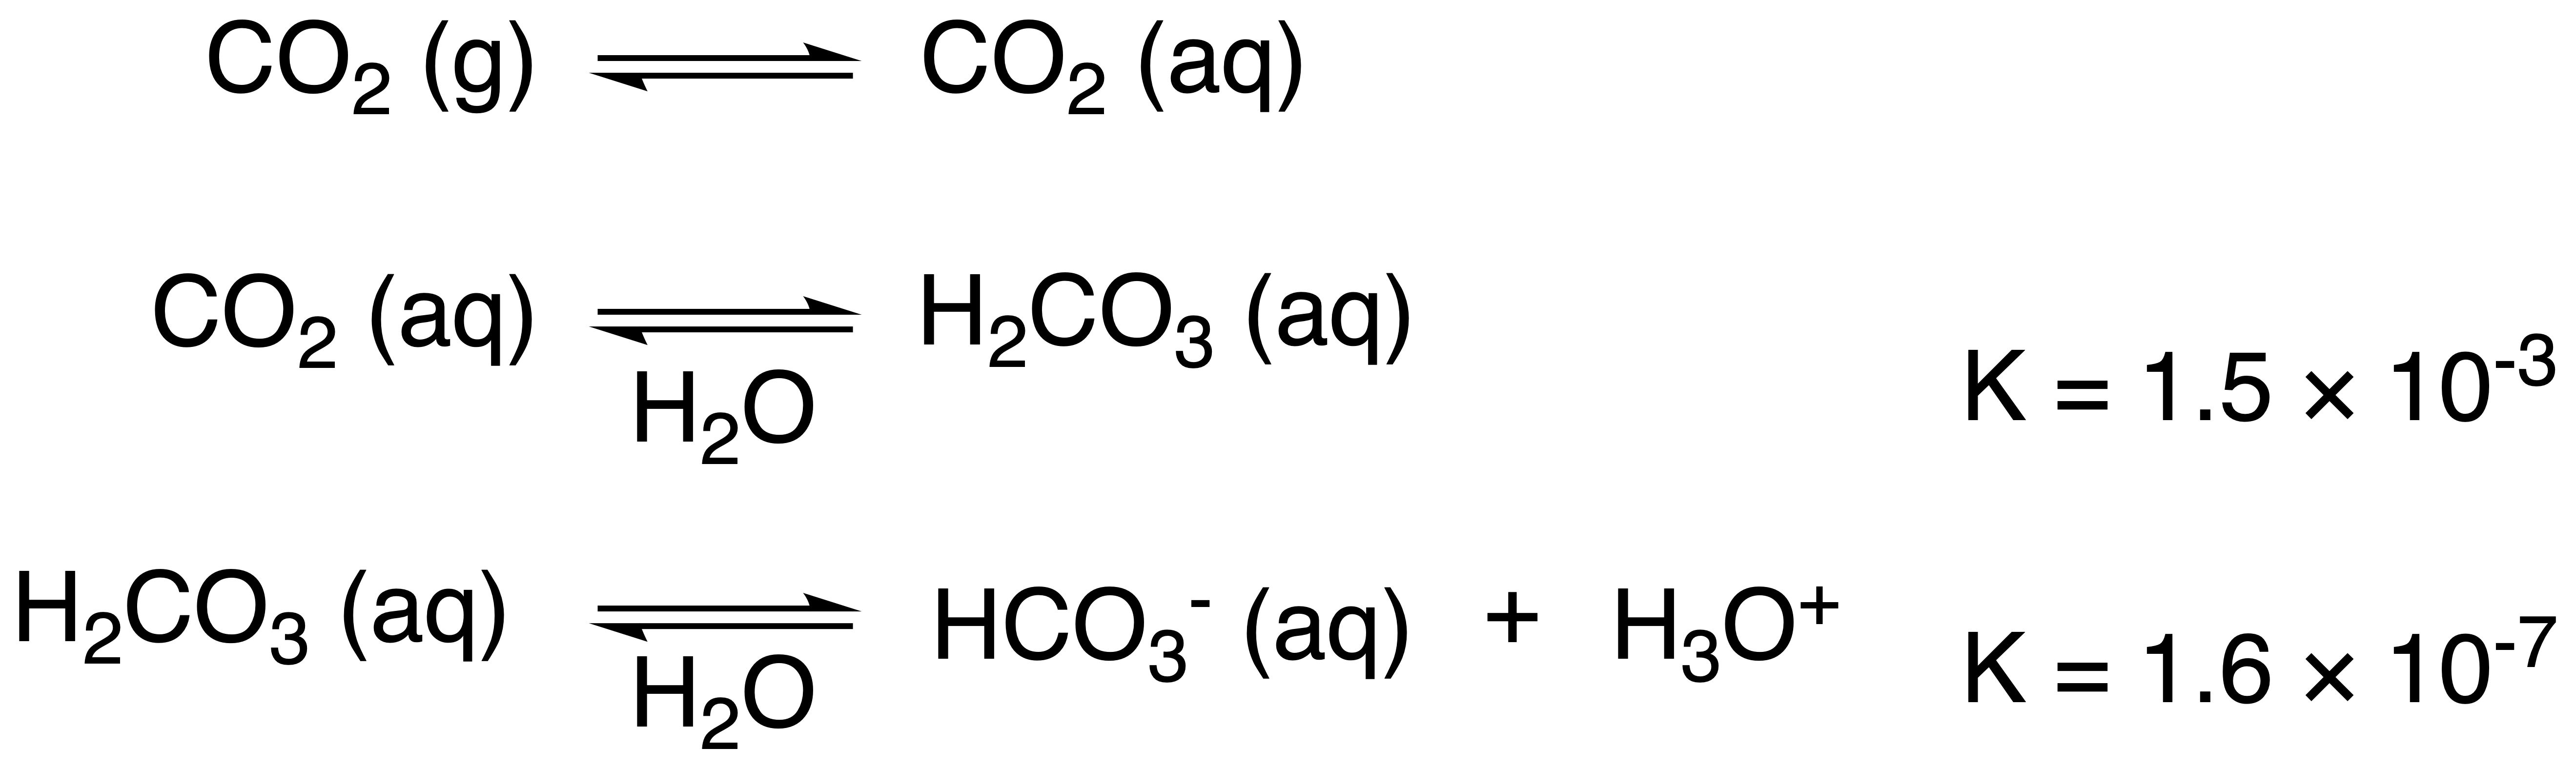

In [ ]:
# Escribe tu código


# Nivel 5: Operaciones con cadenas o strings

**A**. La secuencia génica del sentido (lado codificante) que codifica para RFP fue proporcionada. \[5\] Imprime la hebra antisentido (complementaria inversa) de todo el marco de lectura abierto.

In [ ]:
rfp = 'agtttcagccagtgacagggtgagctgccaggtattctaacaagatgagttgttccaagaatgtgatcaaggagttcatgaggttcaaggttcgtatggaaggaacggtcaatgggcacgagtttgaaataaaaggcgaaggtgaagggaggccttacgaaggtcactgttccgtaaagcttatggtaaccaagggtggacctttgccatttgcttttgatattttgtcaccacaatttcagtatggaagcaaggtatatgtcaaacaccctgccgacataccagactataaaaagctgtcatttcctgagggatttaaatgggaaagggtcatgaactttgaagacggtggcgtggttactgtatcccaagattccagtttgaaagacggctgtttcatctacgaggtcaagttcattggggtgaactttccttctgatggacctgttatgcagaggaggacacggggctgggaagccagctctgagcgtttgtatcctcgtgatggggtgctgaaaggagacatccatatggctctgaggctggaaggaggcggccattacctcgttgaattcaaaagtatttacatggtaaagaagccttcagtgcagttgccaggctactattatgttgactccaaactggatatgacgagccacaacgaagattacacagtcgttgagcagtatgaaaaaacccagggacgccaccatccgttcattaagcctctgcagtgaactcggctcagtcatggattagcggtaatggccacaaaaggcacgatgatcgttttttaggaatgcagccaaaaattgaaggttatgacagtagaaatacaagcaacaggctttgcttattaaacatgtaattgaaaac'

# Escribe el resto del código


**B**. Supongamos que estás diseñando una RNA guía para eliminar el factor de transcripción TRY en *Arabidopsis thaliana*. [6] Se proporcionan los tres exones de TRY. [7] El SpCas9 reconoce el motivo protospacer adyacente (PAM), NGG y CCN (dos guaninas o citosinas consecutivas más un nucleótido). Encuentra el índice de al menos un PAM en cada uno de los exones del gen TRY utilizando el método `find()` de las cadenas de texto.


In [ ]:
exon1 = 'ACAAAGTTAGCCTTCAAAATACTTACAAATCCCAATAAAAGACTTCATCTCCATGTGTATTTGAGTGTCAACGACAAGTCTACACAAAGGGTAAGAGGTCAACAAGACCACACAACACTTCTTACTATTAGTTTTGCAAAGGCCGTTCGTTGGACATTTCCTTCTCTCTCCTCCCCTCTTCTTCTTCTTGTTCGCTCTATAAACTCTCATCTCTCACGTCTTTTTTTCCTTACATTCTCCAAACTCAAAATTTCATCACATTAATTTCTCTCTATTTTTCTTTTCTTACTTCAATAGTAATGGATAACACTGACCGTCGTCGCCGTCGTAAGCAACACAAAATCGCCCTCCATGACTCTGAAG'
exon2 = 'AAGTGAGCAGTATCGAATGGGAGTTTATCAACATGACTGAACAAGAAGAAGATCTCATCTTTCGAATGTACAGACTTGTCGGTGATAG'
exon3 = 'GTGGGATTTGATAGCAGGAAGAGTTCCTGGAAGACAACCAGAGGAGATAGAGAGATATTGGATAATGAGAAACAGTGAAGGCTTTGCTGATAAACGACGCCAGCTTCACTCATCTTCCCACAAACATACCAAGCCTCACCGTCCTCGCTTTTCTATCTATCCTTCCTAGTGTTTTTGTTTTTAAGCCAACGAAAAAAGAAAATAAAAAAATTATAATAGATGTATAGTAGTGGTTCTTGTTAGTTTGAAGAATTCATCATCTATTGTTTTCTTTTTGTTGTTATTTCATTTATAATTTTTATAGTATAGGTTTCATTTGGTAATCAACTTTAATCCATGCGGTTAGGTTTTTTTATTTTCTCGTCTACGACTTTTATATCCACAACTAGATTTTAATCCGCGGTATATCGCGGTATAATTTACTTTTTAAAGTTAATATATATTAAAACTTG'

# wEscribe el resto del código


**C**. Supongamos que tenemos una lista de compuestos orgánicos para someter a un análisis adicional. Tenemos sus SMILES, pero notamos que algunas de las entradas están complejadas con iones más pequeños. Queremos conservar solo la molécula con el SMILES más largo. Las estructuras desconectadas están separadas por puntos (`.`) en los SMILES. Utiliza el método de cadena `split()` para obtener una lista de estructuras para la D-glucosamina sulfato, determinar las longitudes de cada SMILES e imprimir los SMILES con el ion eliminado.

In [ ]:
d_glucosamine_sulfate = 'C([C@H]([C@H]([C@@H]([C@H](C=O)N)O)O)O)O.OS(=O)(=O)O'
# Escribe el resto del código

**D**. Estás extrayendo valores de energía optimizados de un cálculo de optimización de geometría utilizando el programa QUICK. \[8\] Se proporciona la línea que contiene el valor total de energía. Extrae el valor total de energía como un número decimal.

In [ ]:
saveline = ' TOTAL ENERGY         =  -884.004943174\n'
# Escribe el resto del código


# Nivel 6

## Funciones

**A**. Escribe una función que devuelva el índice de un sitio de reconocimiento de la proteasa del virus del mosaico del tabaco (TEV) en una secuencia de péptidos. El sitio TEV es la secuencia ENLYFQ. Aunque la secuencia ENLYFQS exhibe la mayor eficiencia catalítica, la última posición también puede ser G, A, M, C o H. Ejecuta la función en la secuencia de péptidos de la sarafotoxina recombinante. \[9\]

In [ ]:
recombinant_sarafotoxin = 'MKDDAAIQQTLAKMGIKSSDIQPAPVAGMKTVLTNSGVLYITDDGKHIIQGPMYDVSGTAPVNVTNKMLLKQLNALEKEMIVYKAPQEKHVITVFTDITCGYCHKLHEQMADYNALGITVRYLAFPRQGLDSDAEKEMKAIWCAKDKNKAFDDVMAGKSVAPASCDVDIADHYALGVQLGVSGTPAVVLSNGTLVPGYQPPKEMKEFLDEHQKMTSGKGSTSGSGHHHHHHGTMTSLYKKAGLENLYFQCTCKDMTDKECLYFCHQDIIW'

# Escribe el resto del código


**B**. Write two functions: the first function returns the reaction quotient $Q$, the second is the Nernst equation which returns the reduction potential.

Nernst equation:

$$
    \Delta E = \Delta E^\circ - \frac{RT}{nF}\ln Q
$$

Para lo cual:

- $\Delta E$: cambio en el potencial de reducción
- $\Delta E^\circ$: cambio en el potencial de reducción estándar
- $R$: constante de los gases ideales $\left(8.314 \frac{J}{mol\cdot K}\right)$
- $T$: temperatura
- $n$: número de electrones involucrados
- $F$: constante de Faraday $\left(96.49 \frac{kJ}{V\cdot mol}\right)$
- $Q$: cociente de reacción

Calcula el potencial de reducción de la siguiente reacción, en la cual $[Ag^+] = 0.04 mM$ y $[Mn^{2+}] = 0.13 mM$.

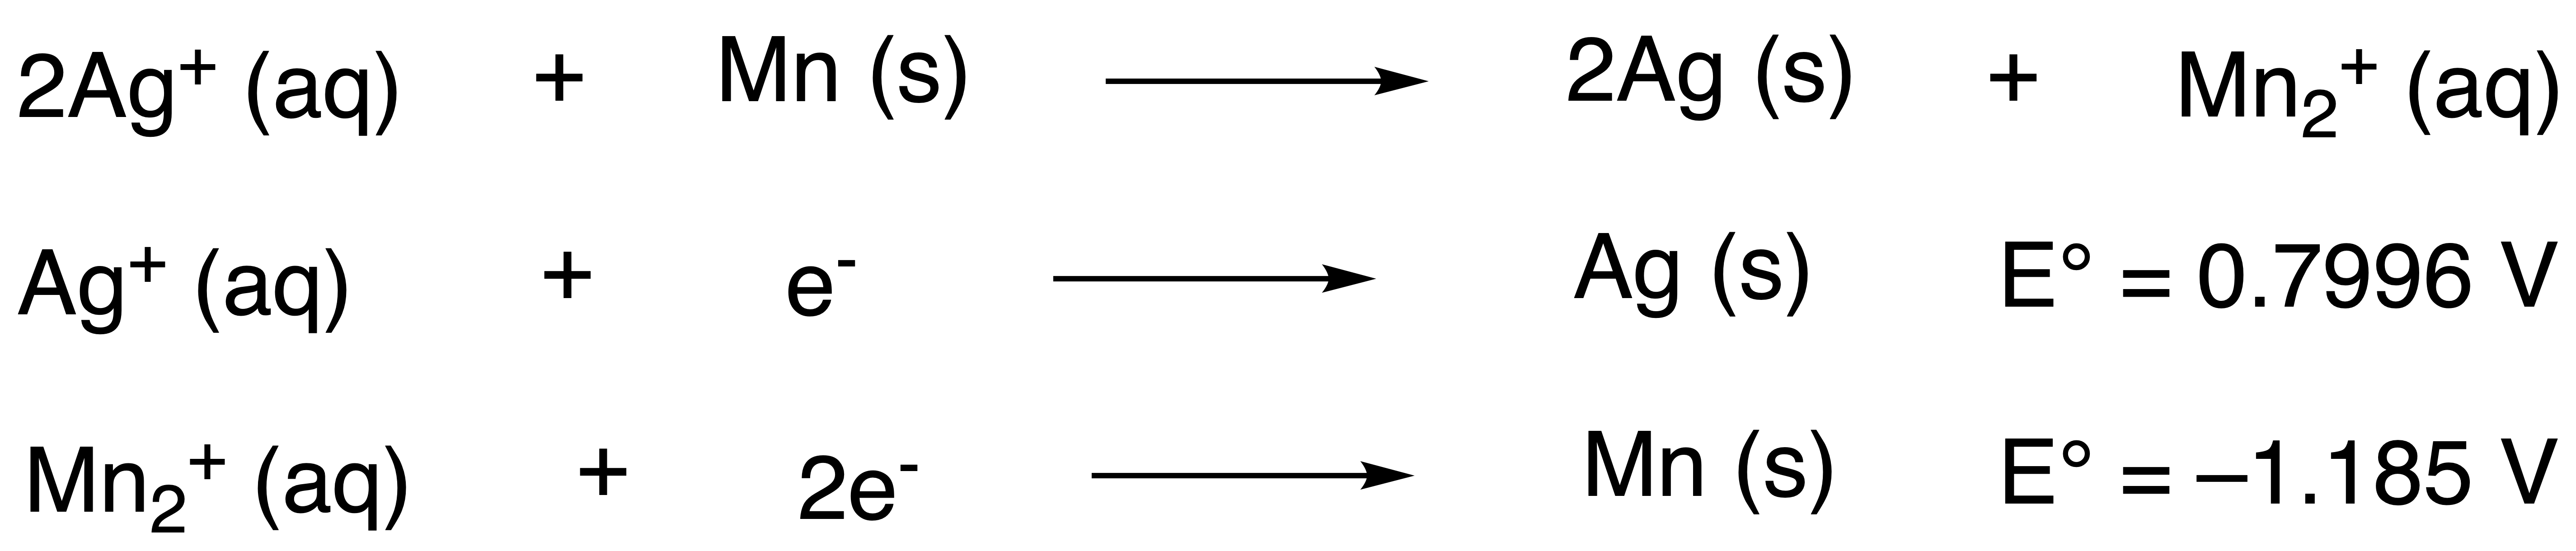

In [ ]:
# Escribe el resto del código


**C**. El código fuente de una función se proporciona, pero está mal escrito. Los nombres de la función y las variables son crípticos y no hay ninguna anotación. Mantenga el comportamiento de la función, pero actualícelo de manera legible. Utilice la función actualizada para resolver el siguiente problema: Se sintetizó 3-Hidroxi-1-(naftalen-1-il)pent-4-en-1-ona ($C_{15}H_{14}O_2$). La masa exacta del aducto sodiado se determinó como $249.0881$ mediante espectrometría de masas de alta resolución (HRMS). Determine si la medición es consistente o no con la masa exacta calculada. \[10\]

In [ ]:
exact_masses = {'C': 12.000000, 'H': 1.007825, 'O': 15.994915, 'N': 14.003074, 'Na': 22.989770}

def op(w, x, y, z):
    w + x + y + z
    x = 12.000000 * w + 1.007825 * x + 14.003074 * z + 15.994915 * y
    return x

def operation(x, y):
    return x - (y + 22.989770)


**D**. La desintegración radioactiva del carbono-11 a boro-11 tiene una vida media de $20.364$ minutos. La desintegración radioactiva sigue una cinética de primer orden, $N_t = N_0e^{-kt}$, donde $N_i$ es el número de átomos en el tiempo $i$, $k$ es la constante de desintegración radioactiva, y $t$ es el tiempo. El valor ocupacional de la concentración de aire derivada de dióxido de carbono-11 (DAC) es de $0.3 \frac{n Ci}{mL}$. Supongamos que una medición de $0.03 \frac{n Ci}{mL}$ se considera aceptable en un lugar de trabajo, sin embargo, se midió $0.17 \frac{n Ci}{mL}$. Las operaciones deben detenerse durante $51$ minutos para volver a $0.03 \frac{n Ci}{mL}$, sin embargo, hay algo incorrecto en el código a continuación para calcular esto. Depure el script.

In [ ]:
from math import log

def k_from_halflife(t_half):
    '''Calculate decay constant k from halflife in inverse time'''
    return - log(1/2 / (t_half))

def time_relative(fraction, k):
    '''Calculate the time taken for radioactive decay with decay constant k
    to achieve a fraction of the initial amount.'''
    return log(fraction)/ k

halflife = 20.364 # minutes
k = k_from_halflife(t_half):
time_shutdown = time_relative(0.03/0.17, k)
print(time_shutdown, 'minutes')

# Nivel 7

## Conditional Statements

**A**. Usamos la unidad lineal rectificada (ReLU), que es una función de activación popular en el aprendizaje profundo. Las funciones de activación introducen no linealidad en el modelo. La función ReLU se muestra. Implementa la función ReLU que acepta un valor escalar.

$$
    ReLU(x) = \left\lbrace\begin{array}{cc}
    x & \text{if } x > 0 \\
    0 & \text{otherwise}
    \end{array}\right.
$$

In [ ]:
# Escribe el resto del código


**B**. Los desplazamientos químicos medidos en la espectroscopia de resonancia nuclear de protones están correlacionados con grupos funcionales. Escribe una función que devuelva posibles grupos funcionales basados en un desplazamiento químico. Algunos grupos funcionales y el intervalo en el que suelen aparecer se enumeran a continuación.

- aliphatic: $0.5 - 2.0 ppm$
- allylic: $1.5 - 2.5 ppm$
- CH2-X: $2.5 - 4.5 ppm$
- ROH: $0.5 - 5.0 ppm$
- vinylic: $4.5 - 6.5 ppm$
- aromatic: $6.0 - 8.5 ppm$

In [ ]:
# Escribe el resto del código


## Loops

**A**. Escribe una función que acepte el número entero $i$ y devuelva el $i$-ésimo número en la secuencia de Fibonacci. La secuencia de Fibonacci es una serie de números naturales en la que la entrada $i$-ésima es la suma de los números $(i-2)$-ésimo y $(i-1)$-ésimo. Los primeros diez números de la secuencia de Fibonacci son: $1, 1, 2, 3, 5, 8, 13, 21, 34, 55$.

In [ ]:
# Escribe el resto del código


**B**. Supongamos que hemos determinado de forma analítica el coeficiente de difusión a $24^\circ C$ para encontrar el radio de Stokes-Einstein de las moléculas de medicamento en agua. \[11\] Supongamos que las moléculas son esferas. Calcula el radio de Stokes-Einstein para todos los compuestos en un bucle for.

Ecuación de Stokes-Einstein para un sistema esférico

$$
    R_H = \frac{k_B T}{6\pi \eta D}
$$

for which:
- $k_B$: Constante de Boltzmann $\left(1.38 \times 10^{-23} \frac{J}{K}\right)$
- $T$: temperatura
- $\eta$: Viscosidad del líquido
- $D$: Coeficiente de difusión del ion.

In [ ]:
drug_diffusion_coef = { # D in x10^(-6) cm^2/s
    'caffeine': 9.0,
    'calcein': 3.8,
    'chloramphenicol': 6.6,
    'ketoprofen': 6.4,
    'nitrofurantoin': 7.1,
    'paracetamol': 7.8,
    'penicillin G': 6.5,
    'tetracycline': 5.8,
    'trimethoprim': 5.6,
    'vancomycin': 2.9
}

# Escribe el resto del código


**C**. Anteriormente identificamos los índices de PAM en los exones del factor de transcripción TRY de *A. thaliana* para SpCas9. \[6\] Escribe una función que tome la secuencia del exón en minúsculas y ponga en mayúsculas a todos los candidatos para el ARN guía que se reconozcan. La región debe cumplir todas las siguientes condiciones:
- Ubicado en el extremo 5' del PAM. (\<sequence\>-NGG or CCN-\<sequence\>)
- Es de $20$ nucleótidos de longitud.
- No contiene cuatro o más "T" consecutivas.
- El contenido de GC es del $30-80\%$

In [ ]:
exon1 = 'ACAAAGTTAGCCTTCAAAATACTTACAAATCCCAATAAAAGACTTCATCTCCATGTGTATTTGAGTGTCAACGACAAGTCTACACAAAGGGTAAGAGGTCAACAAGACCACACAACACTTCTTACTATTAGTTTTGCAAAGGCCGTTCGTTGGACATTTCCTTCTCTCTCCTCCCCTCTTCTTCTTCTTGTTCGCTCTATAAACTCTCATCTCTCACGTCTTTTTTTCCTTACATTCTCCAAACTCAAAATTTCATCACATTAATTTCTCTCTATTTTTCTTTTCTTACTTCAATAGTAATGGATAACACTGACCGTCGTCGCCGTCGTAAGCAACACAAAATCGCCCTCCATGACTCTGAAG'
exon2 = 'AAGTGAGCAGTATCGAATGGGAGTTTATCAACATGACTGAACAAGAAGAAGATCTCATCTTTCGAATGTACAGACTTGTCGGTGATAG'
exon3 = 'GTGGGATTTGATAGCAGGAAGAGTTCCTGGAAGACAACCAGAGGAGATAGAGAGATATTGGATAATGAGAAACAGTGAAGGCTTTGCTGATAAACGACGCCAGCTTCACTCATCTTCCCACAAACATACCAAGCCTCACCGTCCTCGCTTTTCTATCTATCCTTCCTAGTGTTTTTGTTTTTAAGCCAACGAAAAAAGAAAATAAAAAAATTATAATAGATGTATAGTAGTGGTTCTTGTTAGTTTGAAGAATTCATCATCTATTGTTTTCTTTTTGTTGTTATTTCATTTATAATTTTTATAGTATAGGTTTCATTTGGTAATCAACTTTAATCCATGCGGTTAGGTTTTTTTATTTTCTCGTCTACGACTTTTATATCCACAACTAGATTTTAATCCGCGGTATATCGCGGTATAATTTACTTTTTAAAGTTAATATATATTAAAACTTG'

# Escribe el resto del código


**D**. Deseas prototipar el comportamiento de un titulador automático de pH, que incluye una sonda de pH, una bomba de ácido clorhídrico $1N$ y una bomba de hidróxido de sodio 1N conectadas a la misma computadora. Quieres que una reacción enzimática proceda durante una hora con un pH en el rango de $(7.0, 7.2)$. El pH debe medirse en incrementos de $30$ segundos si se encuentra dentro de ese intervalo. Si el pH se sale del rango, agrega la solución apropiada gota a gota para volver al rango de pH, en incrementos de $1s$. Utiliza las funciones proporcionadas para definir el comportamiento. Prueba el código acelerando el tiempo en $60$ órdenes. El pH fluctúa al muestrear de una distribución gaussiana cada $30$ segundos, únicamente con fines ilustrativos.

In [ ]:
from time import time, sleep
from random import gauss

pH = 7.1
hcl_added = 0 # mL
naoh_added = 0 # mL
one_drop = 0.0648524 # mL

def add_hcl():
    '''use by: hcl_added, pH = add_hcl()
    This will update the record of added HCl and update the pH'''
    return hcl_added + one_drop, pH - 0.05

def add_naoh():
    '''use by: naoh_added, pH = add_naoh() '''
    return naoh_added + one_drop, pH + 0.05

times = {
    'reaction': 1 * 60 * 60, # s
    'in_range': 30, # s
    'out_range': 1 # s
}
# expedite the time by 60 fold
speedup = 60
times = {name:t / speedup for (name, t) in times.items()}

toc = time() # current time in s
one_second_counter = 0

tic = time() # current time in s

while (tic - toc) < times['reaction']:
    # if the pH is on range, wait 30s. pH fluctuates
    if pH > 7.0 and pH < 7.2:
        sleep(times['in_range'])
        pH += gauss(0, 0.05)
    # program behavior of the titrator off range from here
    # be sure to add one to one_second_counter if 1s elapses


    # complete the code



    # Once implemented the off-range behavior, test out the code
    # if 30 counts of the 1s counter are recorded, fluctuate the pH
    if one_second_counter == 30:
        # reset the counter
        one_second_counter = 0
        # fluctuate pH
        pH += gauss(0, 0.05)
    tic = time()
    time_elapsed = (tic - toc)/60 * speedup # min
    print('%.2f min   |   pH = %.2f' %(time_elapsed, pH))

print('reaction complete - program off')
print('HCl (1N) added: %.2f mL' %hcl_added)
print('NaOH (1N) added: %.2f mL' %naoh_added)


# Referencias

\[1\] Norio Miyaura, Kinji Yamada, and Akira Suzuki. A new stereospecific cross-coupling by the palladium-catalyzed reaction of 1-alkenylboranes with 1-alkenyl or 1-alkynyl halides. *Tetrahedron Letters*, 20(36):3437–3440, 1979.

\[2\] Dominik Mojzita, Merja Penttilä, and Peter Richard. Identification of an l-arabinose reductase gene in aspergillus niger and its role in l-arabinose catabolism. *Journal of biological chemistry*, 285(31):23622–23628, 2010.

\[3\] NK Boardman and SW Thorne. Sensitive fluorescence method for the determination of chlorophyll achlorophyll b ratios. *Biochimica et Biophysica Acta (BBA)-Bioenergetics*, 253(1):222–231, 1971.

\[4\] Bradley D Eyre, Tyler Cyronak, Patrick Drupp, Eric Heinen De Carlo, Julian P Sachs, and Andreas J Andersson. Coral reefs will transition to net dissolving before end of century. *Science*, 359(6378):908–911, 2018.

\[5\] Arkady F Fradkov, Ying Chen, Li Ding, Ekaterina V Barsova, Mikhail V Matz, and Sergey A Lukyanov. Novel fluorescent protein from discosoma coral and its mutants possesses a unique far-red fluorescence. *FEBS letters*, 479(3):127–130, 2000.

\[6\] Ramona Grützner, Patrick Martin, Claudia Horn, Samuel Mortensen, Erin J Cram, Carolyn WT Lee-Parsons, Johannes Stuttmann, and Sylvestre Marillonnet. High-efficiency genome editing in plants mediated by a cas9 gene containing multiple introns. *Plant communications*, 2(2):100135, 2021.

\[7\] Gene \[Internet\]. Bethesda (MD): National Library of Medicine (US), National Center for Biotechnology Information; \[1988\] – . Gene ID: 835401, Arabidopsis thaliana Homeodomain-like superfamily protein (TRY), Chromosome: 5; \[cited 2022-01-08\]. Available from: https://www.ncbi.nlm.nih.gov/gene/835401.

\[8\] (a) Madushanka Manathunga, Yipu Miao, Dawei Mu, Andreas W Götz, and Kenneth M Merz Jr. Parallel implementation of density functional theory methods in the quantum interaction computational kernel program. *Journal of Chemical Theory and Computation*, 16(7):4315–4326, 2020. (b) M. Manathunga, C. Jin, V.W.D. Cruzeiro, J. Smith, K. Keipert, D. Pekurovsky, D. Mu, Y. Miao, X. He, K Ayers, E. Brothers, A.W. Götz, and K. M. Merz. Quick-21.03. URL: https://github.com/merzlab/QUICK.

\[9\] Ana Filipa Sequeira, Jeremy Turchetto, Natalie J Saez, Fanny Peysson, Laurie Ramond, Yoan Duhoo, Marilyne Blémont, Vânia O Fernandes, Luís T Gama, Luís MA Ferreira, and others. Gene design, fusion technology and tev cleavage conditions influence the purification of oxidized disulphide-rich venom peptides in escherichia coli. *Microbial cell factories*, 16(1):4, 2017.

\[10\] Rodney A Fernandes, Ashvin J Gangani, and Arpita Panja. Synthesis of 5-vinyl-2-isoxazolines by palladium-catalyzed intramolecular o-allylation of ketoximes. *Organic Letters*, 23(16):6227–6231, 2021.

\[11\] Massimiliano Pio Di Cagno, Fabrizio Clarelli, Jon Våbenø, Christina Lesley, Sokar Darsim Rahman, Jennifer Cauzzo, Erica Franceschinis, Nicola Realdon, and Paul C Stein. Experimental determination of drug diffusion coefficients in unstirred aqueous environments by temporally resolved concentration measurements. *Molecular pharmaceutics*, 15(4):1488–1494, 2018.
